<a href="https://colab.research.google.com/github/Shoukhin1803078/RUL_Prediction_Thesis/blob/main/Dataset_Preprocessing_and_Model_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Creation


In [ ]:

import pandas as pd

file_path = '/content/RUL.xls'
data = pd.read_excel(file_path)

def calculate_rul(row):

    row = row.replace({'Ok': 1, 'Noisy': 0, 'Clean': 1, 'Dirty': 0})

    avg = (row['bearings'] + row['wpump'] + row['radiator'] + row['exvalve']) / 4

    if avg >= 0.75:
        return 'Long'
    elif avg >= 0.5:
        return 'Medium'
    else:
        return 'Urgent'

data['RUL'] = data.apply(calculate_rul, axis=1)

print(data.head())



  bearings wpump radiator exvalve acmotor   RUL
0       Ok    Ok    Clean   Clean  Stable  Long
1       Ok    Ok    Clean   Clean  Stable  Long
2       Ok    Ok    Clean   Clean  Stable  Long
3       Ok    Ok    Clean   Clean  Stable  Long
4       Ok    Ok    Clean   Clean  Stable  Long


In [ ]:
import pandas as pd


def convert_to_binary(value):
    if value in ['Ok', 'Clean']:
        return 1
    elif value in ['Noisy', 'Dirty']:
        return 0
    return None

def categorize_rul(avg):
    if avg >= 0.75:
        return 'Long'
    elif avg >= 0.5:
        return 'Medium'
    else:
        return 'Urgent'

data = pd.read_excel('/content/RUL.xls')


for col in ['bearings', 'wpump', 'radiator', 'exvalve']:
    data[col] = data[col].apply(convert_to_binary)

data['Avg'] = data[['bearings', 'wpump', 'radiator', 'exvalve']].mean(axis=1)


data['RUL'] = data['Avg'].apply(categorize_rul)


print(data.head(1000))



     bearings  wpump  radiator  exvalve acmotor   Avg   RUL
0           1      1         1        1  Stable  1.00  Long
1           1      1         1        1  Stable  1.00  Long
2           1      1         1        1  Stable  1.00  Long
3           1      1         1        1  Stable  1.00  Long
4           1      1         1        1  Stable  1.00  Long
..        ...    ...       ...      ...     ...   ...   ...
995         1      1         1        0  Stable  0.75  Long
996         1      1         1        0  Stable  0.75  Long
997         1      1         1        0  Stable  0.75  Long
998         1      1         1        0  Stable  0.75  Long
999         1      1         1        0  Stable  0.75  Long

[1000 rows x 7 columns]


In [ ]:
import pandas as pd
import random


weights = {'bearings': 0.75, 'wpump': 0.5, 'radiator': 0.25, 'exvalve': 0.25}

def calculate_avg(row):
    row = row.replace({'Ok': 1, 'Noisy': 0, 'Clean': 1, 'Dirty': 0})
    weighted_avg = (row['bearings'] * weights['bearings'] +
                    row['wpump'] * weights['wpump'] +
                    row['radiator'] * weights['radiator'] +
                    row['exvalve'] * weights['exvalve']) / sum(weights.values())
    return weighted_avg


def calculate_rul(avg):
    if avg >= 0.75:
        return 'Long'
    elif avg >= 0.5:
        return 'Medium'
    else:
        return 'Urgent'


data = pd.DataFrame(columns=['bearings', 'wpump', 'radiator', 'exvalve', 'acmotor'])


num_new_cases = 50
for i in range(num_new_cases):
    bearings = random.choice(['Ok', 'Noisy'])
    wpump = random.choice(['Ok', 'Noisy'])
    radiator = random.choice(['Clean', 'Dirty'])
    exvalve = random.choice(['Clean', 'Dirty'])
    acmotor = 'stable'


    new_row = {'bearings': bearings, 'wpump': wpump, 'radiator': radiator, 'exvalve': exvalve, 'acmotor': acmotor}
    data = data.append(new_row, ignore_index=True)


data['avg'] = data.apply(calculate_avg, axis=1)
data['RUL'] = data['avg'].apply(calculate_rul)
data['avg_percentage'] = data['avg'] * 100


output_file_path = '/content/updated_dataset_no_rownum.xlsx'
data.to_excel(output_file_path, index=False)


data.tail(num_new_cases)



<ipython-input-16-6d0473bc885b>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(new_row, ignore_index=True)
<ipython-input-16-6d0473bc885b>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(new_row, ignore_index=True)
<ipython-input-16-6d0473bc885b>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(new_row, ignore_index=True)
<ipython-input-16-6d0473bc885b>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(new_row, ignore_index=True)
<ipython-input-16-6d0473bc885b>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fu

,bearings,wpump,radiator,exvalve,acmotor,avg,RUL,avg_percentage
0,Ok,Noisy,Clean,Dirty,stable,0.571429,Medium,57.142857
1,Noisy,Noisy,Clean,Dirty,stable,0.142857,Urgent,14.285714
2,Noisy,Noisy,Dirty,Dirty,stable,0.000000,Urgent,0.000000
3,Ok,Ok,Clean,Dirty,stable,0.857143,Long,85.714286
4,Noisy,Ok,Clean,Clean,stable,0.571429,Medium,57.142857
5,Noisy,Noisy,Clean,Clean,stable,0.285714,Urgent,28.571429
6,Ok,Noisy,Clean,Clean,stable,0.714286,Medium,71.428571
7,Ok,Noisy,Clean,Dirty,stable,0.571429,Medium,57.142857
8,Ok,Noisy,Clean,Clean,stable,0.714286,Medium,71.428571
9,Ok,Noisy,Dirty,Clean,stable,0.571429,Medium,57.142857


In [ ]:

import pandas as pd

file_path = '/content/updated_RUL_dataset.xlsx'
data = pd.read_excel(file_path)

def calculate_rul(row):

    row = row.replace({'Ok': 1, 'Noisy': 0, 'Clean': 1, 'Dirty': 0})

    avg = (row['bearings'] + row['wpump'] + row['radiator'] + row['exvalve']) / 4

    if avg >= 0.75:
        return 'Long'
    elif avg >= 0.5:
        return 'Medium'
    else:
        return 'Urgent'

data['RUL'] = data.apply(calculate_rul, axis=1)

print(data.head())



  bearings wpump radiator exvalve acmotor  avg   RUL  avg_percentage
0       Ok    Ok    Clean   Clean  Stable  1.0  Long           100.0
1       Ok    Ok    Clean   Clean  Stable  1.0  Long           100.0
2       Ok    Ok    Clean   Clean  Stable  1.0  Long           100.0
3       Ok    Ok    Clean   Clean  Stable  1.0  Long           100.0
4       Ok    Ok    Clean   Clean  Stable  1.0  Long           100.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


data = pd.read_excel('/content/updated_RUL_dataset.xlsx')


label_encoders = {
    'bearings': LabelEncoder(),
    'wpump': LabelEncoder(),
    'radiator': LabelEncoder(),
    'exvalve': LabelEncoder(),
    'acmotor': LabelEncoder()
}


for col in label_encoders.keys():
    data[col] = label_encoders[col].fit_transform(data[col])


X = data[['bearings', 'wpump', 'radiator', 'exvalve', 'acmotor']]
y = data['RUL']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


def predict_rul(bearings, wpump, radiator, exvalve, acmotor):
    input_data = pd.DataFrame([[bearings, wpump, radiator, exvalve, acmotor]],
                              columns=['bearings', 'wpump', 'radiator', 'exvalve', 'acmotor'])
    for col in input_data.columns:
        input_data[col] = label_encoders[col].transform(input_data[col])
    prediction = model.predict(input_data)
    return prediction[0]


example_prediction = predict_rul('Ok', 'Noisy', 'Clean', 'Dirty', 'stable')
print("Predicted RUL:", example_prediction)


Accuracy: 1.0
Predicted RUL: Medium


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


def get_user_input():
    bearings = input("Enter 'bearings' value (Ok/Noisy): ")
    wpump = input("Enter 'wpump' value (Ok/Noisy): ")
    radiator = input("Enter 'radiator' value (Clean/Dirty): ")
    exvalve = input("Enter 'exvalve' value (Clean/Dirty): ")
    acmotor = input("Enter 'acmotor' value (stable/other): ")
    return [bearings, wpump, radiator, exvalve, acmotor]


def predict_rul(model, label_encoders, input_data):
    for col in input_data.columns:
        input_data[col] = label_encoders[col].transform(input_data[col])
    prediction = model.predict(input_data)
    return prediction[0]


data = pd.read_excel('/content/updated_RUL_dataset.xlsx')


label_encoders = {col: LabelEncoder() for col in ['bearings', 'wpump', 'radiator', 'exvalve', 'acmotor']}
for col in label_encoders.keys():
    data[col] = label_encoders[col].fit_transform(data[col])


X = data[['bearings', 'wpump', 'radiator', 'exvalve', 'acmotor']]
y = data['RUL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


user_input = pd.DataFrame([get_user_input()], columns=['bearings', 'wpump', 'radiator', 'exvalve', 'acmotor'])


predicted_rul = predict_rul(model, label_encoders, user_input)
print(f"Predicted RUL: {predicted_rul}")


Enter 'bearings' value (Ok/Noisy): Ok
Enter 'wpump' value (Ok/Noisy): Noisy
Enter 'radiator' value (Clean/Dirty): Dirty
Enter 'exvalve' value (Clean/Dirty): Clean
Enter 'acmotor' value (stable/other): stable
Predicted RUL: Medium


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


def get_user_input():
    bearings = input("Enter 'bearings' value (Ok/Noisy): ")
    wpump = input("Enter 'wpump' value (Ok/Noisy): ")
    radiator = input("Enter 'radiator' value (Clean/Dirty): ")
    exvalve = input("Enter 'exvalve' value (Clean/Dirty): ")
    acmotor = input("Enter 'acmotor' value (stable/other): ")
    return [bearings, wpump, radiator, exvalve, acmotor]


def predict_rul(model, label_encoders, input_data):
    for col in input_data.columns:
        input_data[col] = label_encoders[col].transform(input_data[col])
    prediction = model.predict(input_data)
    return prediction[0]


data = pd.read_excel('/content/updated_RUL_dataset.xlsx')


label_encoders = {col: LabelEncoder() for col in ['bearings', 'wpump', 'radiator', 'exvalve', 'acmotor']}
for col in label_encoders.keys():
    data[col] = label_encoders[col].fit_transform(data[col])


X = data[['bearings', 'wpump', 'radiator', 'exvalve', 'acmotor']]
y = data['RUL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


user_input = pd.DataFrame([get_user_input()], columns=['bearings', 'wpump', 'radiator', 'exvalve', 'acmotor'])


predicted_rul = predict_rul(model, label_encoders, user_input)
print(f"Predicted RUL: {predicted_rul}")


Model Accuracy: 1.0
Enter 'bearings' value (Ok/Noisy): Noisy
Enter 'wpump' value (Ok/Noisy): Noisy
Enter 'radiator' value (Clean/Dirty): Dirty
Enter 'exvalve' value (Clean/Dirty): Dirty
Enter 'acmotor' value (stable/other): stable
Predicted RUL: Urgent


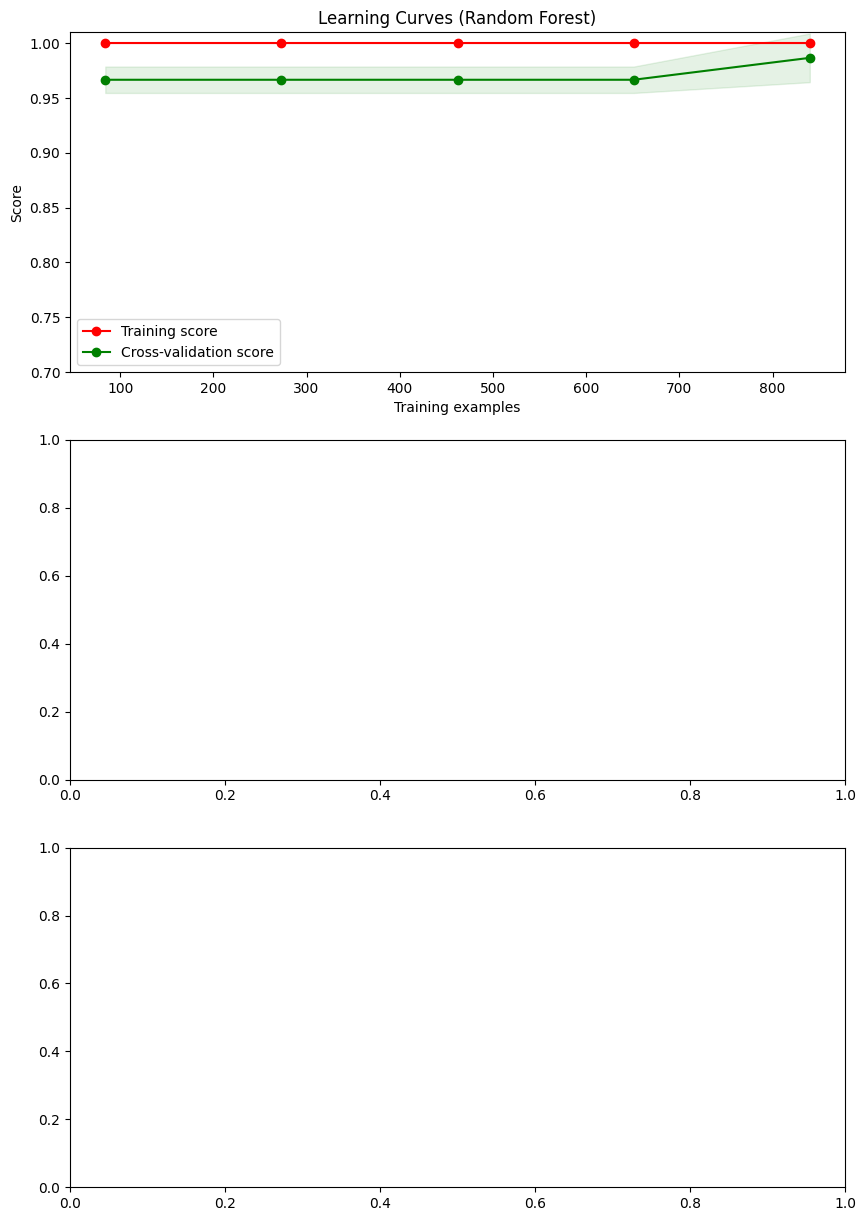

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    """
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)


    axes.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes.legend(loc="best")

    return plt

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

title = "Learning Curves (Random Forest)"
cv = 5
plot_learning_curve(RandomForestClassifier(random_state=42), title, X, y, axes=axes[0], ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.show()


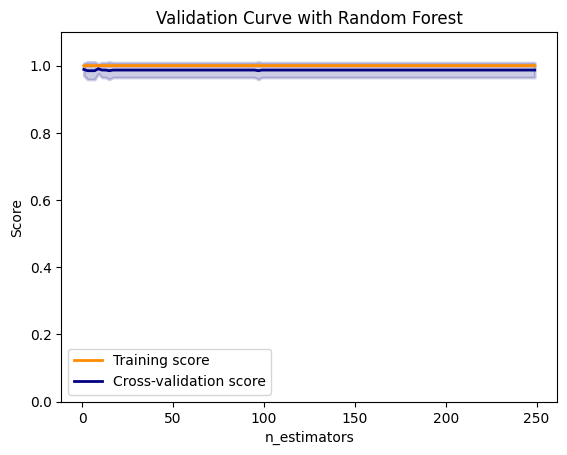

In [ ]:
from sklearn.model_selection import validation_curve

param_range = np.arange(1, 250, 2)
train_scores, test_scores = validation_curve(
    RandomForestClassifier(), X, y, param_name="n_estimators", param_range=param_range,
    scoring="accuracy", n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Random Forest")
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

# New Section

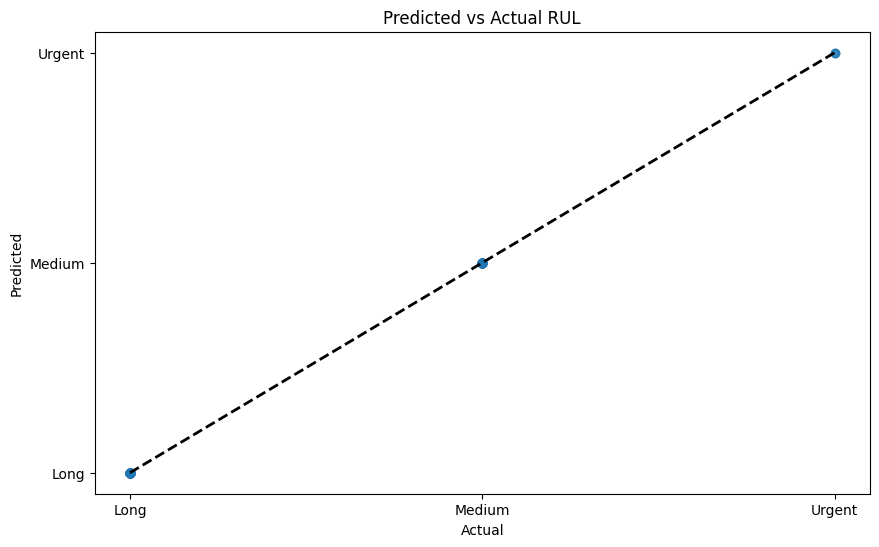

In [ ]:

y_pred = model.predict(X_test)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual RUL')
plt.show()
